

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>






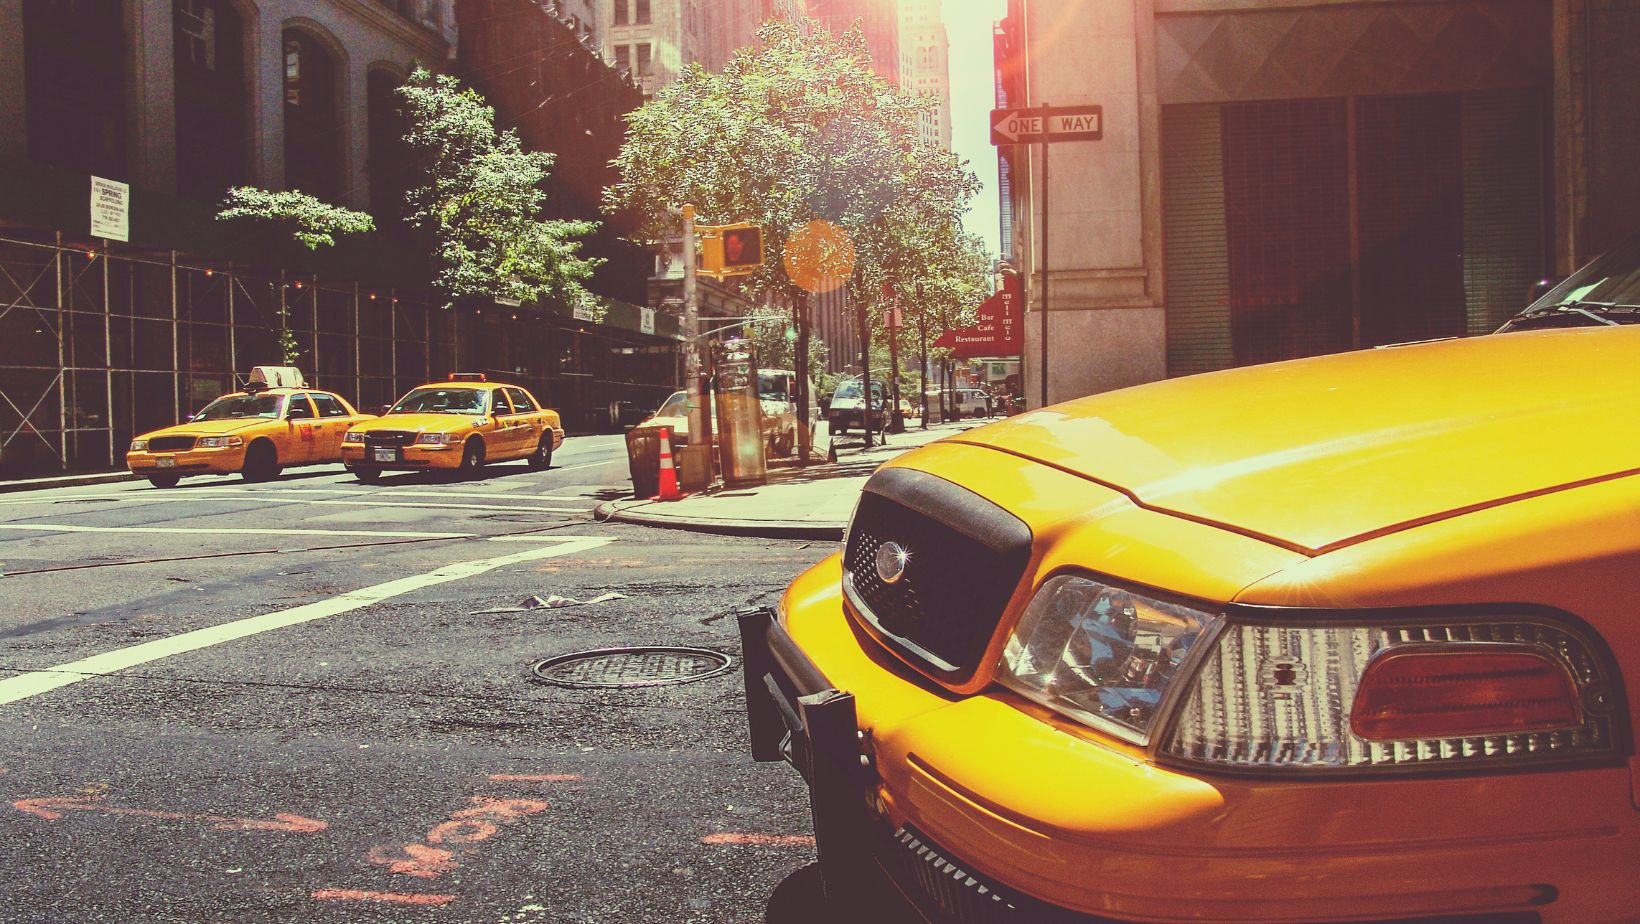

# *O Clima é o X-Factor das Corridas de Táxi em Chicago?*

*Bem-vindo à Zuber, a nova empresa de compartilhamento de caronas de Chicago!*

*Como analista, sua missão é desvendar os segredos das corridas de táxi na cidade. Vamos explorar um banco de dados repleto de informações sobre corridas e, além disso, investigar o impacto do clima nas viagens.*

*Prepare-se para uma jornada de descoberta de padrões e insights que aprimorarão nossos serviços e tornarão as viagens mais agradáveis para nossos passageiros. Vamos começar!*

# *Inicializando Project*

In [1]:
# carregando bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st

In [2]:
# carregando arquivos
df_company = pd.read_csv('C:/my_workspace/triple_ten/project6/data/moved_project_sql_result_01.csv')
df_location = pd.read_csv('C:/my_workspace/triple_ten/project6/data/moved_project_sql_result_04.csv')
df_weather = pd.read_csv('C:/my_workspace/triple_ten/project6/data/moved_project_sql_result_07.csv')

# *Iniciando limpeza e tratamento dos dados*

### *df_company*

In [3]:
# informações
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# verificando nomes das colunas
df_company.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [5]:
# primeiras impressões
df_company.tail()
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
df_company.sample(15)

,company_name,trips_amount
18,24 Seven Taxi,1775
46,3620 - 52292 David K. Cab Corp.,21
50,2823 - 73307 Lee Express Inc,15
0,Flash Cab,19558
8,Star North Management LLC,7455
23,KOAM Taxi Association,1259
55,6057 - 24657 Richard Addo,13
3,Yellow Cab,9888
56,5997 - 65283 AW Services Inc.,12
34,Norshore Cab,127


In [7]:
# mais algumas informações
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [8]:
# tamanho
df_company.shape

(64, 2)

In [9]:
# valores únicos
len(df_company.company_name.unique())

64

In [10]:
# procurando por duplicados
df_company.duplicated().sum()

0

In [11]:
# valores nulos?
df_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
    
Só certifique-se de deixar uma conclusão sobre o que foi observado na sessão.
</div>



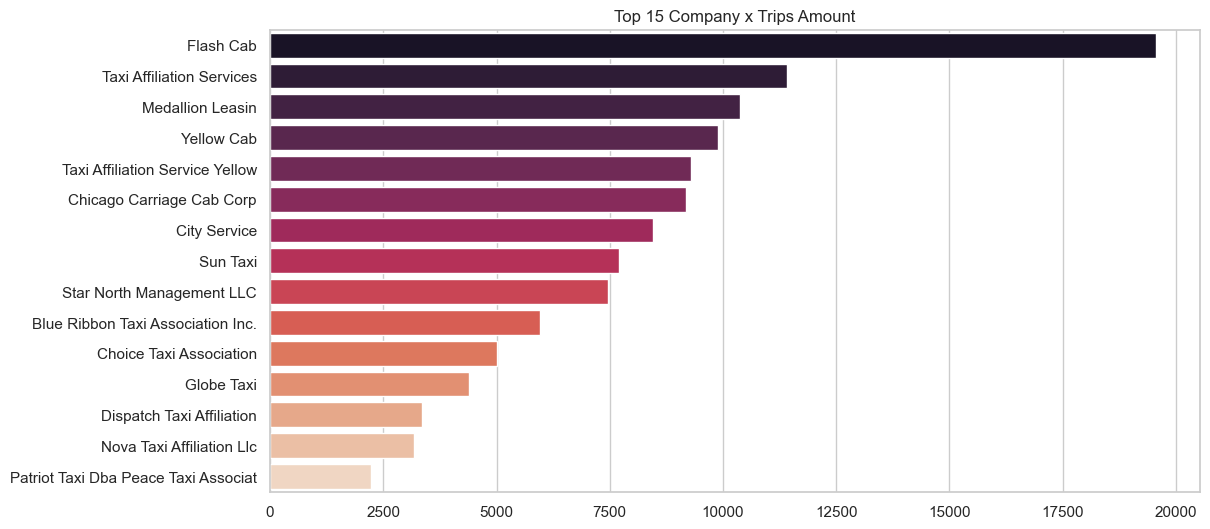

In [12]:
# criando top 15
top15_company = df_company.sort_values(by='trips_amount', ascending=False).head(15)
# plotando
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=top15_company, palette='rocket')
plt.title('Top 15 Company x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

*Overview de df_company:*
- *sem nulos e sem duplicados*
- *dados em formato ideal*
- *grande diferença entre média e mediana em trips_amount*
- *company "Flash Cab" tem excelente performance*


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo certo com essa primeira análise.
</div>



### *df_location*

In [13]:
# info gerais
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [14]:
# nomes das colunas
df_location.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

In [15]:
# tamanho
df_location.shape

(94, 2)

In [16]:
# mais algumas informações
df_location.tail()
df_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [17]:
# mais info sobre o df_location
df_location.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [18]:
# procurando por duplicados
df_location.duplicated().sum()

0

In [19]:
# procurando por nulos
df_location.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [20]:
# verificando valores únicos
df_location.dropoff_location_name.unique()
len(df_location.dropoff_location_name.unique())

94

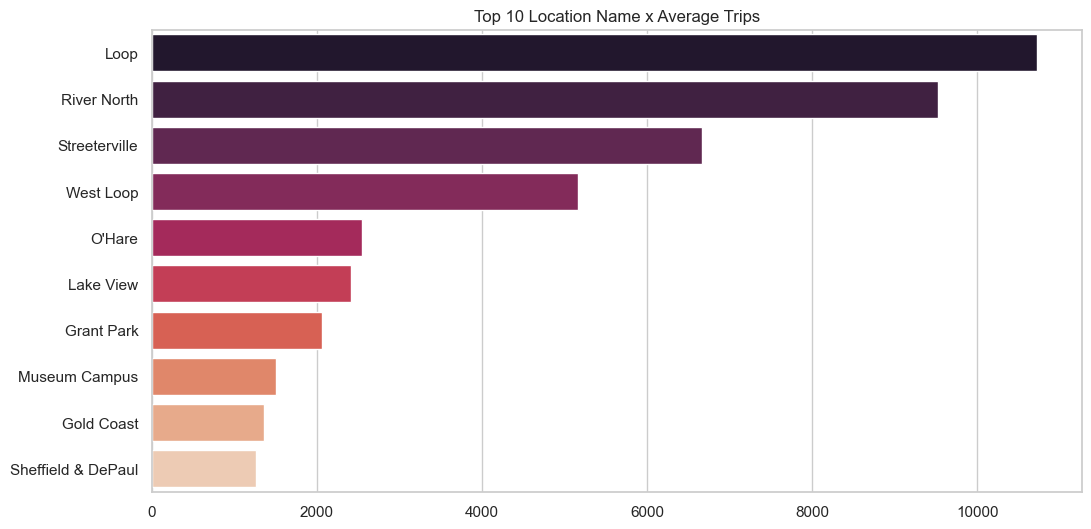

In [21]:
# criando top 10 destinos
top10_location = df_location.sort_values(by='average_trips', ascending=False).head(10)
# plotando
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top10_location, palette='rocket')
plt.title('Top 10 Location Name x Average Trips')
plt.xlabel('')
plt.ylabel('')
plt.show()

*Overview de df_location:*
- *novamente sem nulos e sem duplicados*
- *plotamos um gráfico para visualizar melhor os 10 principais destinos*
- *corridas para a região "River North", "Streeterville" e "Loop" possuem as maiores médias de viagens*
- *o termo "Loop" refere-se a área do distrito de negócios do centro de cidade, onde frequentemente atendem a área central, que inclui muitos escritórios, hotéis, restaurantes, atrações turísticas e podem estar sujeitos a regulamentações e tarifas específicas*


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo correto com esa segunda análise também!
</div>



### *df_weather*

In [22]:
# informações
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [23]:
# nomes das colunas
df_weather.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

In [24]:
# mais informações
df_weather.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [25]:
# verificando formato
df_weather.start_ts.dtypes

dtype('O')

In [26]:
# alterando formato coluna start_ts
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])

In [27]:
# visualizando...
df_weather.tail()
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [28]:
# verificando valores únicos de weather_conditions
df_weather.weather_conditions.unique()

array(['Good', 'Bad'], dtype=object)

In [29]:
# temos valores nulos?
df_weather.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [30]:
# procurando por duplicados
df_weather.duplicated().sum()

197

*Temos duplicados, vamos olhar mais de perto.*

In [31]:
# selecionando os duplicados
duplicated = df_weather[df_weather.duplicated(keep=False)]
duplicated

,start_ts,weather_conditions,duration_seconds
4,2017-11-11 07:00:00,Good,1440.0
8,2017-11-11 14:00:00,Good,2460.0
10,2017-11-18 06:00:00,Good,1500.0
16,2017-11-04 12:00:00,Good,2640.0
23,2017-11-04 14:00:00,Good,3360.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [32]:
# mais uma amostra
duplicated = duplicated.sort_values(by='duration_seconds', ascending=False)
duplicated.head(15)
duplicated.tail(15)

,start_ts,weather_conditions,duration_seconds
231,2017-11-04 07:00:00,Good,1200.0
835,2017-11-11 10:00:00,Good,1200.0
845,2017-11-11 08:00:00,Good,1200.0
478,2017-11-11 07:00:00,Good,1200.0
462,2017-11-04 05:00:00,Good,1200.0
450,2017-11-11 06:00:00,Good,1200.0
289,2017-11-11 10:00:00,Good,1200.0
913,2017-11-11 08:00:00,Good,1200.0
720,2017-11-11 10:00:00,Good,1200.0
207,2017-11-11 08:00:00,Good,1200.0


In [33]:
# calculando porcentagem de duplicados
len(duplicated) / df_weather.shape[0]

0.29213483146067415

In [34]:
# removendo duplicados
df_weather = df_weather.drop_duplicates()

In [35]:
# contando corridas onde o duration_seconds é zero
df_duration_seconds_equal_zero = df_weather.loc[ df_weather['duration_seconds'] == 0]
df_duration_seconds_equal_zero

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [36]:
# removendo com seconds = 0
df_weather = df_weather[df_weather['duration_seconds'] != 0]

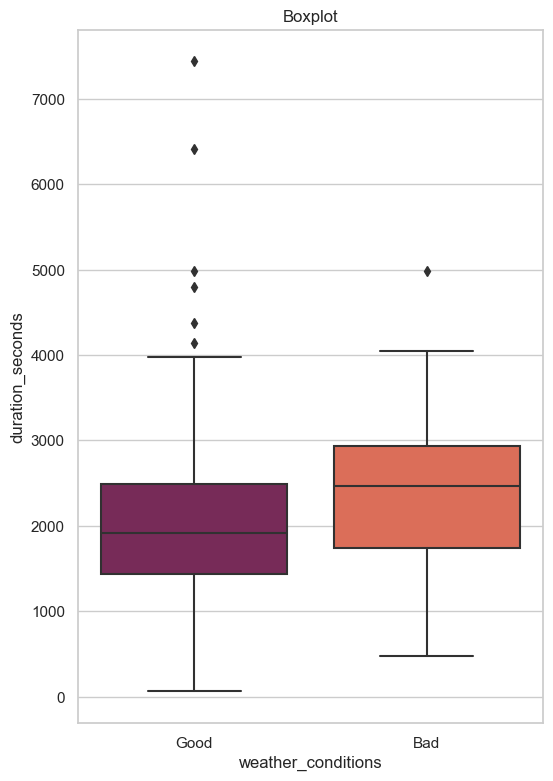

In [37]:
# filtrando
df_bad = df_weather[df_weather['weather_conditions'] == 'Bad']
df_good = df_weather[df_weather['weather_conditions'] == 'Good']

# plotando
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(6, 9))
plt.title('Boxplot')
plt.xlabel('')
plt.ylabel('')
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_weather, palette="rocket")
plt.show()

*Overview de df_location:*
- *novamente sem nulos, mas com dados duplicados*
- *duplicados representavam quase 30% do df*
- *alteramos a coluna start_ts para datetime*
- *média e mediana mais próximas na coluna duration_seconds, mas com desvio padrão relevante*
- *coluna weather_conditions com apenas 2 valores únicos: 'Good' e 'Bad'*
- *removemos do df onde o tempo de duração da 'corrida' era 0 segundos*
- *identificamos outliers e mais alguns insights com a geração dos boxplots*


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito bacana a visualização e os insights que você teve por aqui! Parabéns!
</div>



# *Começando EDA - Análise Exploratória dos Dados*

### *df_company*

In [38]:
# olhando novamente os dados
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [39]:
# Calculando as médias, medianas, variâncias e desvios padrão
mean_value = df_company['trips_amount'].mean()
median_value = df_company['trips_amount'].median()
variance_value = df_company['trips_amount'].var()
std_deviation_value = df_company['trips_amount'].std()

In [40]:
# imprimindo...
print(f'Dados df_company da coluna trips_amount:')
print(f'média -> {round(mean_value, 2)}')
print(f'mediana -> {round(median_value, 2)}')
print(f'variância -> {round(variance_value, 2)}')
print(f'desvio padrão -> {round(std_deviation_value, 2)}')

Dados df_company da coluna trips_amount:
média -> 2145.48
mediana -> 178.5
variância -> 14533708.95
desvio padrão -> 3812.31


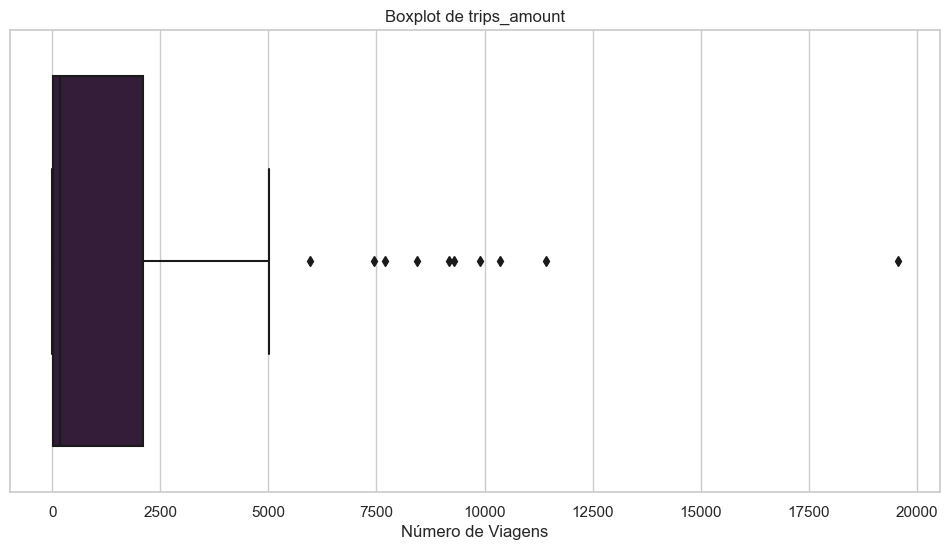

In [41]:
# boxplot
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_company, x='trips_amount')
plt.title('Boxplot de trips_amount')
plt.xlabel('Número de Viagens')
plt.show()

*Temos outliers e iremos tratá-los.*

In [42]:
# calculando
Q1 = df_company['trips_amount'].quantile(0.25)
Q3 = df_company['trips_amount'].quantile(0.75)
IQR = Q3 - Q1

# definindo limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# df_company_without_outliers
df_company_without_outliers = df_company[(df_company['trips_amount'] >= lower_limit) & (df_company['trips_amount'] <= upper_limit)]

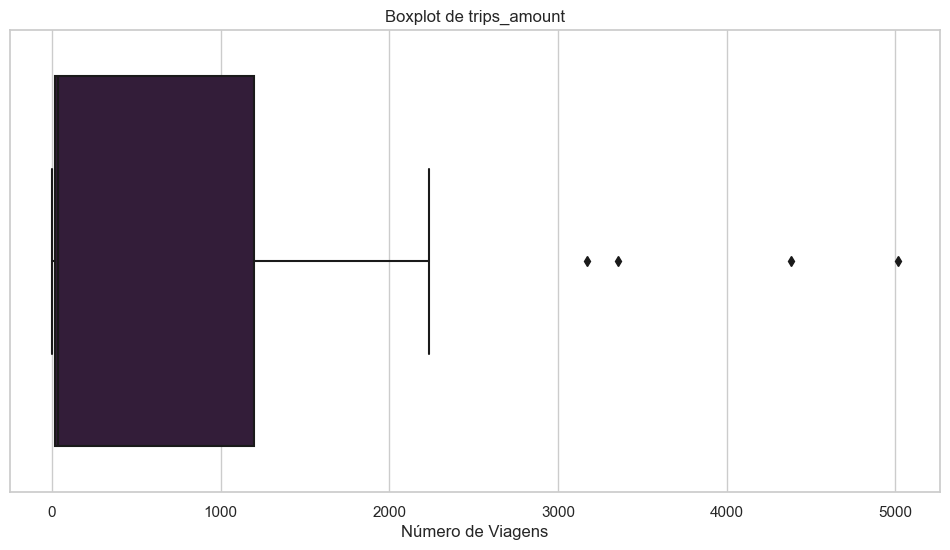

In [43]:
# boxplot without outliers
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_company_without_outliers, x='trips_amount')
plt.title('Boxplot de trips_amount')
plt.xlabel('Número de Viagens')
plt.show()

In [44]:
# dividindo em 4 grupos
quartiles = df_company_without_outliers['trips_amount'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Q4', 'Q3', 'Q2', 'Q1']
df_company_without_outliers['quartile'] = pd.cut(df_company_without_outliers['trips_amount'], bins=quartiles, labels=labels)

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\416039660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company_without_outliers['quartile'] = pd.cut(df_company_without_outliers['trips_amount'], bins=quartiles, labels=labels)


In [45]:
# verificando...
df_company_without_outliers.info()
df_company_without_outliers.head()
# preenchendo 1 valor Nan após pd.cut
df_company_without_outliers = df_company_without_outliers.fillna("Q4")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 10 to 63
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   company_name  54 non-null     object  
 1   trips_amount  54 non-null     int64   
 2   quartile      53 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 1.5+ KB


In [46]:
# selecionando os grupos para plotar
q1 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q1']
q2 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q2']
q3 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q3']
q4 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q4']

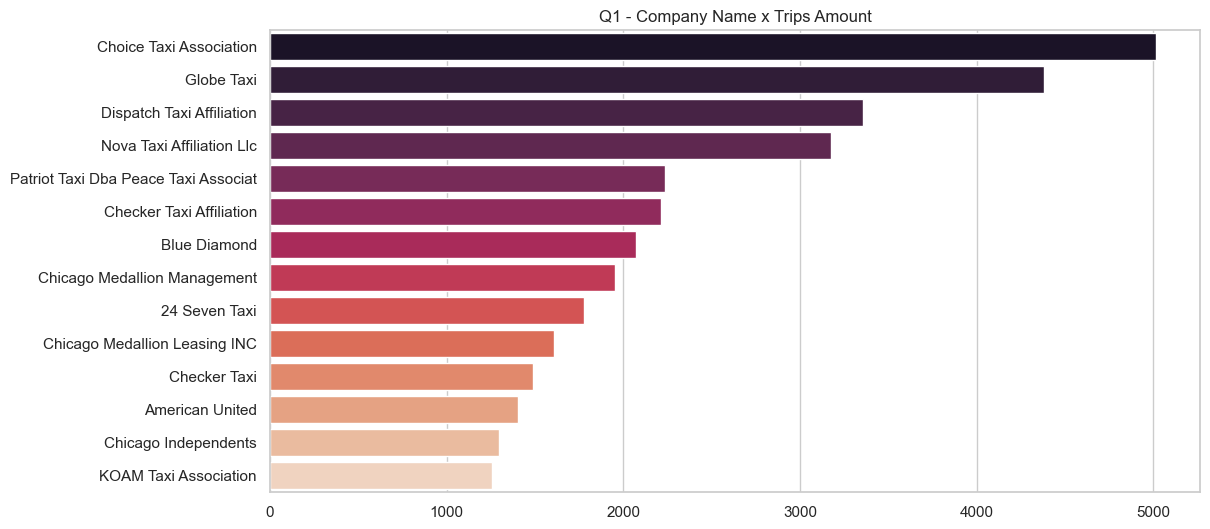

In [47]:
# plotando por quartile Q1
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q1, palette='rocket')
plt.title('Q1 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

*Afiliações e Associações conseguem facilmente passar de 2000 corridas no grupo Q1.*

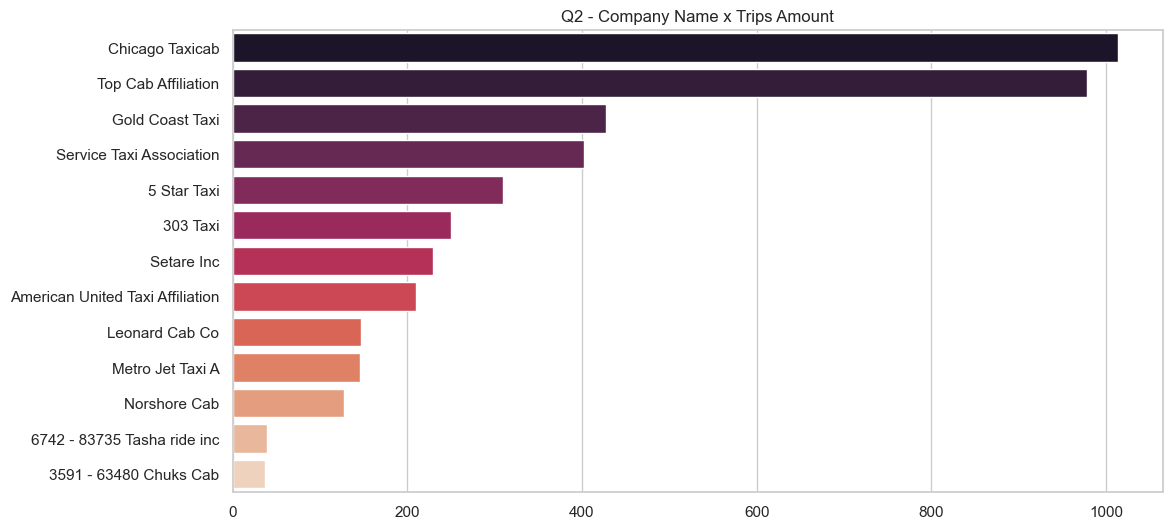

In [48]:
# plotando por quartile Q2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q2, palette='rocket')
plt.title('Q2 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

*"Top Cab Affiliation" em 2° lugar com quase 1000 corridas no Q2.*

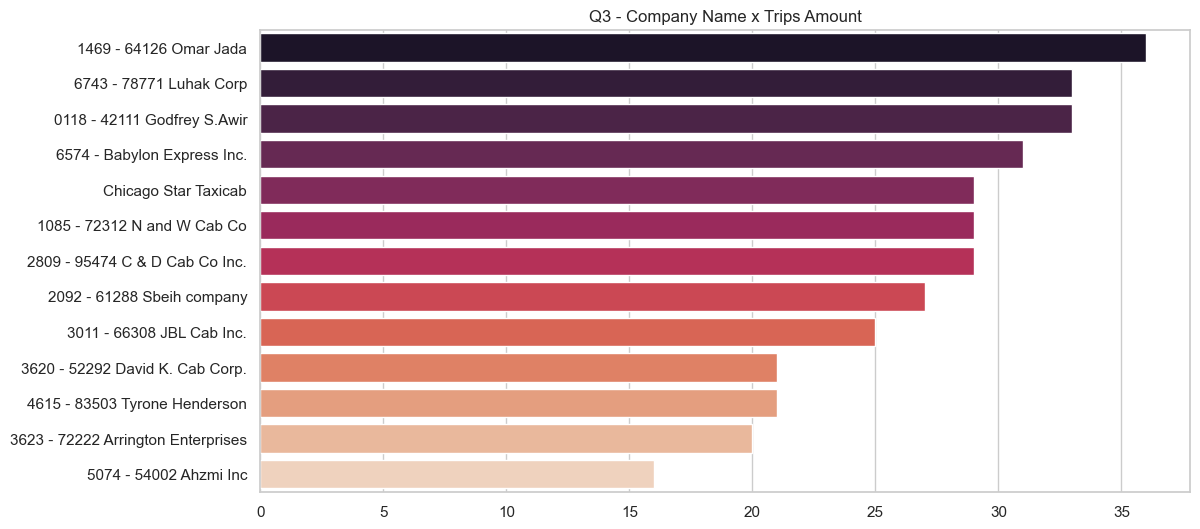

In [49]:
# plotando por quartile Q3
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q3, palette='rocket')
plt.title('Q3 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

*No Q3 começam a aparecer nomes de pessoas "comuns" e não empresas, mas com a quantidade de corridas muito abaixo dos Q1 e Q2.*

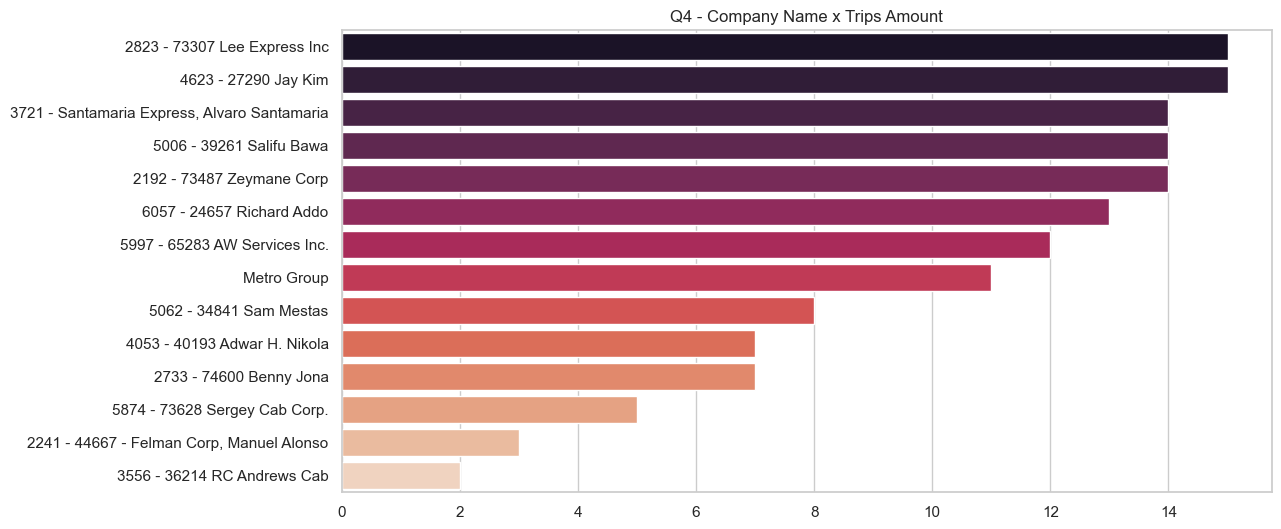

In [50]:
# plotando por quartile Q4
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q4, palette='rocket')
plt.title('Q4 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

*Novamente chegamos a mesma conclusão do Q3 aqui no Q4.*

### *Comparando Q1, Q2, Q3 e Q4*

In [51]:
# agrupando para calcular algumas métricas
grouped = df_company_without_outliers.groupby('quartile')['trips_amount'].agg(['sum', 'mean', 'median', 'std', 'var'])
grouped = grouped.sort_values(by='mean', ascending=False).reset_index()
grouped

,quartile,sum,mean,median,std,var
0,Q1,33231,2373.642857,2012.5,1176.991838,1.385310e+06
1,Q2,4318,332.153846,230.0,317.906130,1.010643e+05
2,Q3,350,26.923077,29.0,5.964639,3.557692e+01
3,Q4,140,10.000000,11.5,4.574175,2.092308e+01


In [52]:
# treemap com a library plotly
fig = px.treemap(grouped, path=['quartile'], values='sum', color_discrete_sequence=px.colors.sequential.RdBu, width=888, height=444, title='Treemap - Soma da Quantidade de Viagens por Quartile (Q1, Q2, Q3 e Q4)')
fig.show()

*Q1 é dominante, quase um monopólio de corridas na cidade, melhor ficar de olhos nestes concorrentes!*


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito completo o trabalho de limpeza dos dados nesa sessão e re-análise. Estou gostando muito!
</div>



### *Analisando a quantidade de viagens das empresas Associadas ou com Afiliações*

In [53]:
# verificando trips_amount por "association/affiliation" tanto no df quanto no df sem outliers e comparando...

# df_company
filtered1 = df_company['company_name'].str.contains('association|affiliation', case=False)
companies_filtered1 = df_company[filtered1]

# df_company_without_outliers
filtered2 = df_company_without_outliers['company_name'].str.contains('association|affiliation', case=False)
companies_filtered2 = df_company_without_outliers[filtered2]

In [54]:
# calculando proporção com o df_company
prop1 = companies_filtered1.trips_amount.sum() / df_company.trips_amount.sum()
print(f'As empresas com nomes "association/affiliation" possuem {round(prop1, 3) * 100}% da quantidade total de viagens do Dataframe original.')

# calculando proporção com o df_company_without_outliers
prop2 = companies_filtered2.trips_amount.sum() / df_company_without_outliers.trips_amount.sum()
print(f'As empresas com nomes "association/affiliation" possuem {round(prop2, 3) * 100}% da quantidade total de viagens do Dataframe removido os outliers.')

As empresas com nomes "association/affiliation" possuem 31.5% da quantidade total de viagens do Dataframe original.
As empresas com nomes "association/affiliation" possuem 43.7% da quantidade total de viagens do Dataframe removido os outliers.


*Overview de df_company:*
- *novamente sem nulos, mas com dados duplicados*
- *identificamos possíveis concorrentes fortíssimos, associações e afiliações*
- *tínhamos outliers e os tratamos*

### *df_location*

In [55]:
# olhando os dados novamente
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [56]:
# Calculando as médias, medianas, variâncias e desvios padrão
mean_value = df_location['average_trips'].mean()
median_value = df_location['average_trips'].median()
variance_value = df_location['average_trips'].var()
std_deviation_value = df_location['average_trips'].std()

In [57]:
# top 15
df_location_t15 = df_location.sort_values(by='average_trips', ascending=False)
df_location_t15 = df_location_t15.head(15)

In [58]:
# imprimindo...
print(f'Dados df_location da coluna average_trips:')
print(f'média -> {round(mean_value, 2)}')
print(f'mediana -> {round(median_value, 2)}')
print(f'variância -> {round(variance_value, 2)}')
print(f'desvio padrão -> {round(std_deviation_value, 2)}')

Dados df_location da coluna average_trips:
média -> 599.95
mediana -> 52.02
variância -> 2939822.63
desvio padrão -> 1714.59


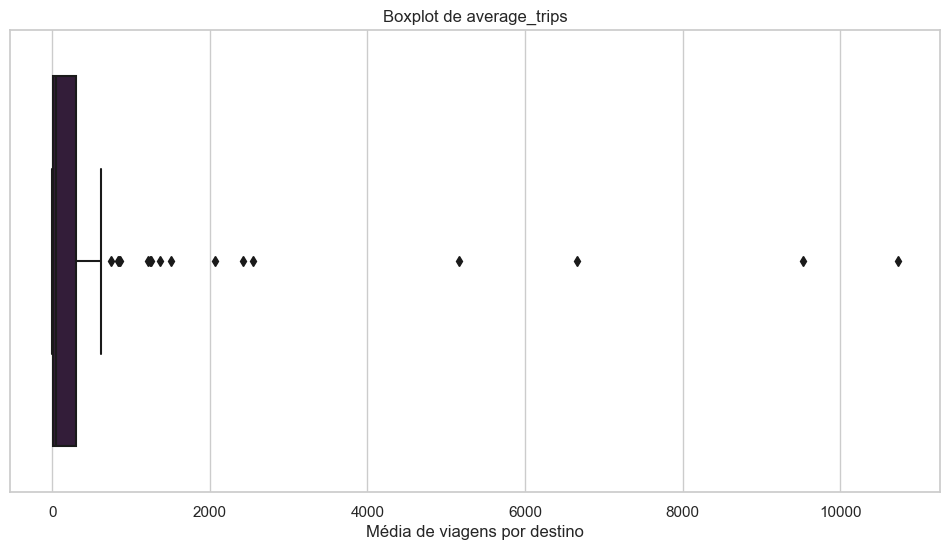

In [59]:
# gerando boxplot
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_location, x='average_trips')
plt.title('Boxplot de average_trips')
plt.xlabel('Média de viagens por destino')
plt.show()

*Tratando outliers.*

In [60]:
# calculando e definindo limites
Q1 = df_location['average_trips'].quantile(0.25)
Q3 = df_location['average_trips'].quantile(0.75)
IQR = Q3 - Q1

# limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# df_location_without_outliers
df_location_without_outliers = df_location[(df_location['average_trips'] >= lower_limit) & (df_location['average_trips'] <= upper_limit)]

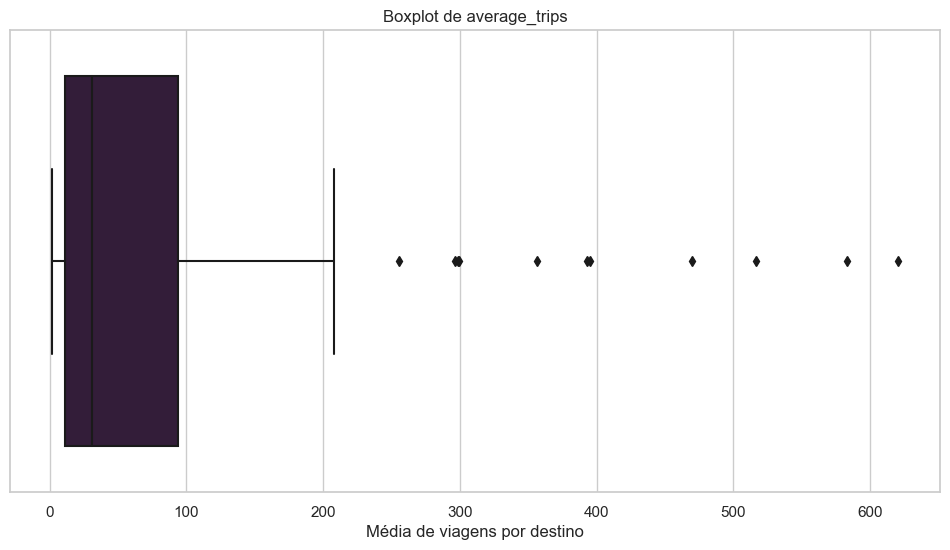

In [61]:
# boxplot refinado
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_location_without_outliers, x='average_trips')
plt.title('Boxplot de average_trips')
plt.xlabel('Média de viagens por destino')
plt.show()

*Vamos dividir em quartis para mais análises.*

In [62]:
# dividindo em 4 grupos
quartiles = df_location_without_outliers['average_trips'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Q4', 'Q3', 'Q2', 'Q1']
df_location_without_outliers['quartile'] = pd.cut(df_location_without_outliers['average_trips'], bins=quartiles, labels=labels)

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\3588527635.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
# certificando
df_location_without_outliers.info()
df_location_without_outliers.tail()
# preenchendo 1 valor Nan após pd.cut
df_location_without_outliers = df_location_without_outliers.fillna("Q4")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 16 to 93
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dropoff_location_name  78 non-null     object  
 1   average_trips          78 non-null     float64 
 2   quartile               77 non-null     category
dtypes: category(1), float64(1), object(1)
memory usage: 2.1+ KB


In [64]:
# selecionando os grupos para plotar
q1 = df_location_without_outliers.loc[df_location_without_outliers['quartile'] == 'Q1']
q2 = df_location_without_outliers.loc[df_location_without_outliers['quartile'] == 'Q2']
q3 = df_location_without_outliers.loc[df_location_without_outliers['quartile'] == 'Q3']
q4 = df_location_without_outliers.loc[df_location_without_outliers['quartile'] == 'Q4']

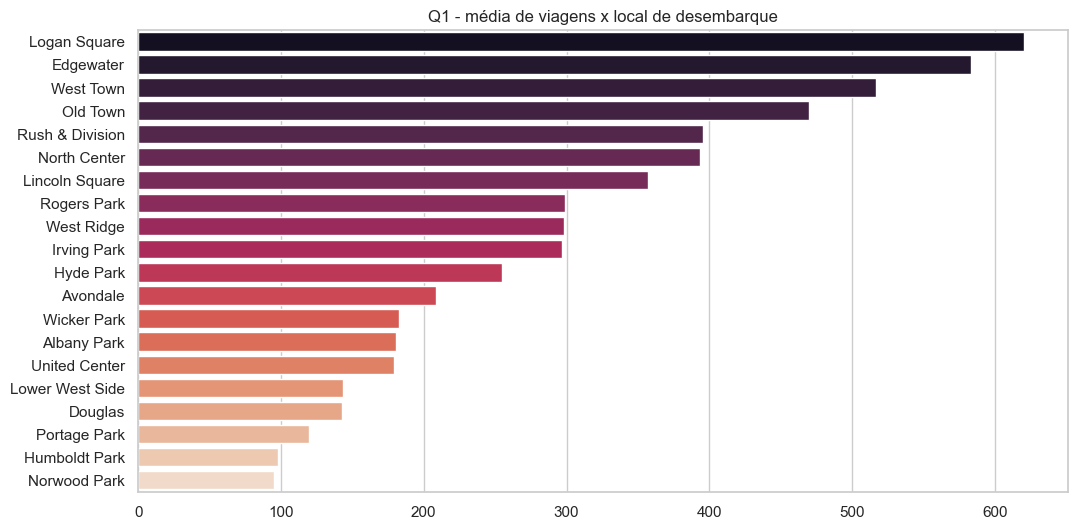

In [65]:
# plotando por quartile Q1
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q1, palette='rocket')
plt.title('Q1 - média de viagens x local de desembarque')
plt.xlabel('')
plt.ylabel('')
plt.show()

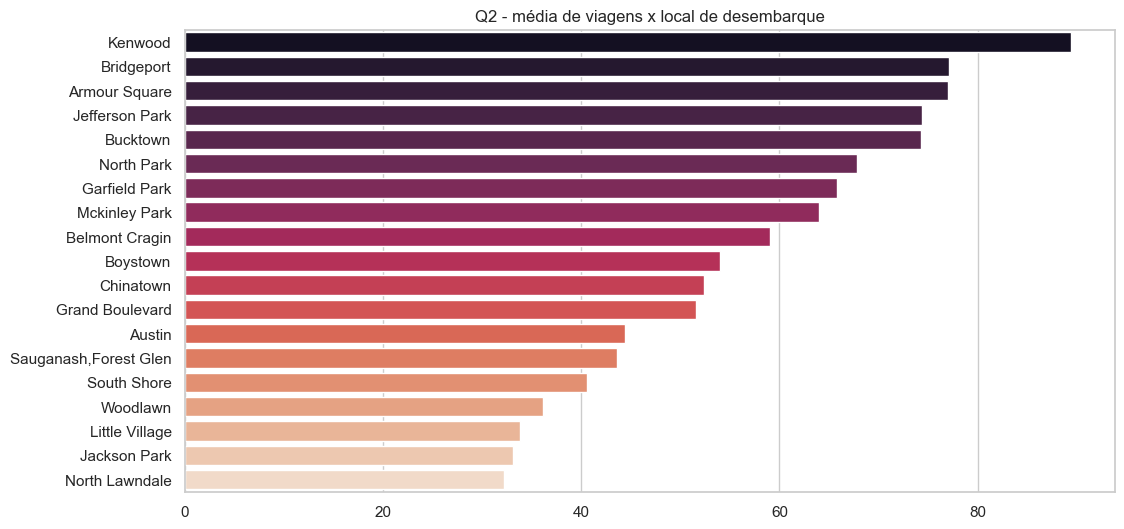

In [66]:
# plotando por quartile Q2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q2, palette='rocket')
plt.title('Q2 - média de viagens x local de desembarque')
plt.xlabel('')
plt.ylabel('')
plt.show()

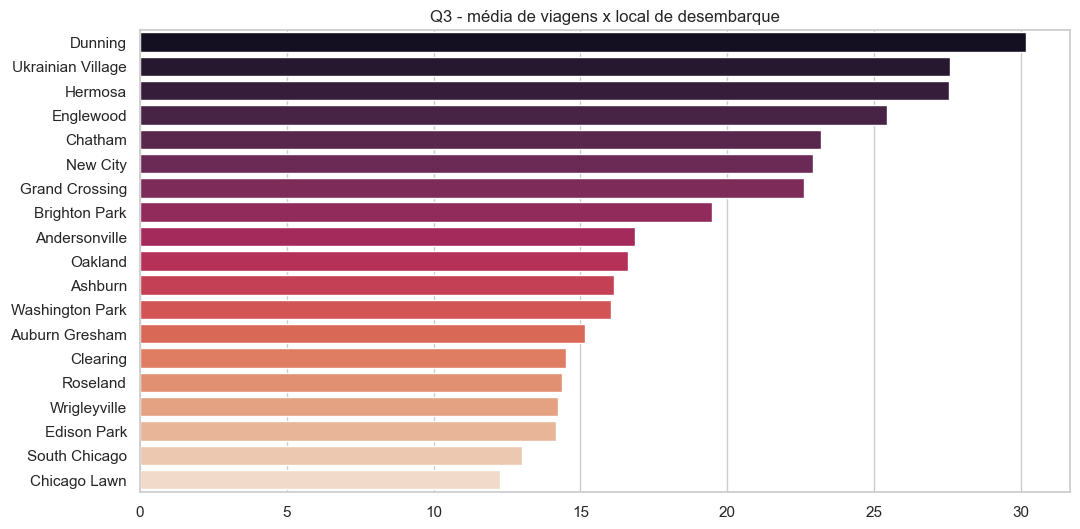

In [67]:
# plotando por quartile Q3
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q3, palette='rocket')
plt.title('Q3 - média de viagens x local de desembarque')
plt.xlabel('')
plt.ylabel('')
plt.show()

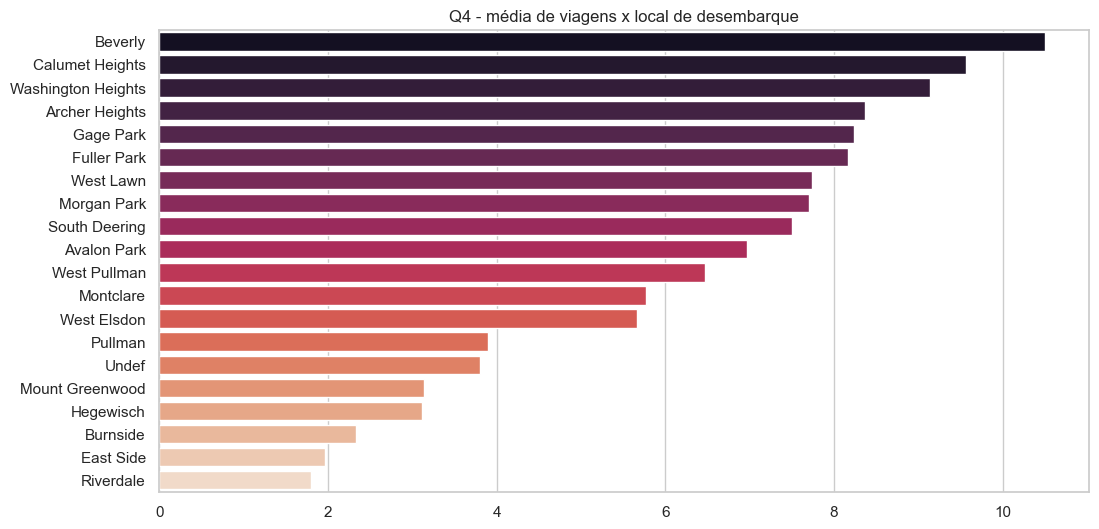

In [68]:
# plotando por quartile Q4
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q4, palette='rocket')
plt.title('Q4 - média de viagens x local de desembarque')
plt.xlabel('')
plt.ylabel('')
plt.show()

### *Contrastando Q1, Q2, Q3 e Q4*

In [69]:
# agrupando para calcular algumas métricas
grouped = df_location_without_outliers.groupby('quartile')['average_trips'].agg(['sum', 'mean', 'median', 'std', 'var'])
grouped = grouped.sort_values(by='mean', ascending=False).reset_index()
grouped

,quartile,sum,mean,median,std,var
0,Q1,5833.866667,291.693333,275.850000,161.525484,26090.481942
1,Q2,1070.570115,56.345796,53.966667,17.513670,306.728651
2,Q3,362.333333,19.070175,16.633333,5.630417,31.701592
3,Q4,121.813668,6.090683,6.716667,2.719592,7.396183


### *df_weather*

In [70]:
# informações
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            865 non-null    datetime64[ns]
 1   weather_conditions  865 non-null    object        
 2   duration_seconds    865 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.0+ KB


In [71]:
# mais informações
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


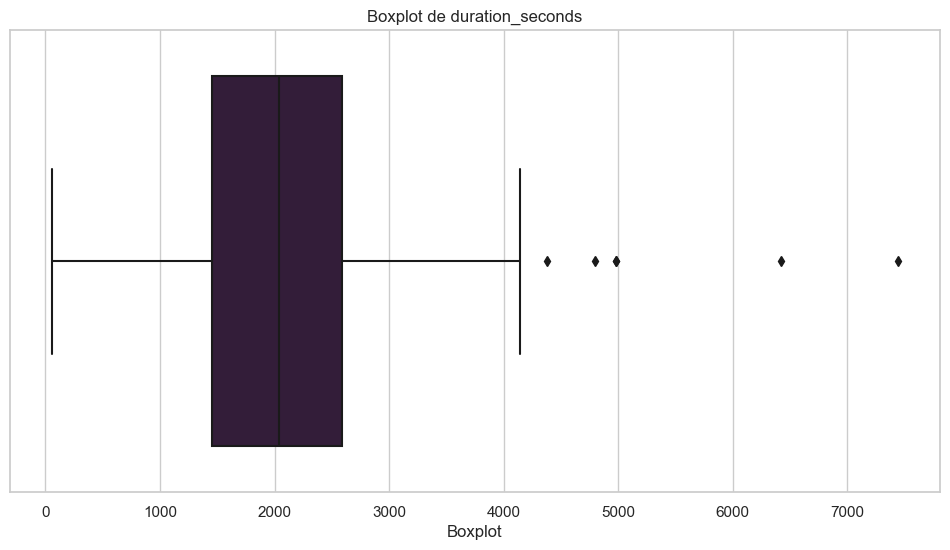

In [72]:
# boxplot de duration_seconds
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_weather, x='duration_seconds')
plt.title('Boxplot de duration_seconds')
plt.xlabel('Boxplot')
plt.show()

*Verificaremos os outliers.*

In [73]:
# calculando e definindo limites
Q1 = df_weather['duration_seconds'].quantile(0.25)
Q3 = df_weather['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# df_location_without_outliers
df_weather_without_outliers = df_weather[(df_weather['duration_seconds'] >= lower_limit) & (df_weather['duration_seconds'] <= upper_limit)]

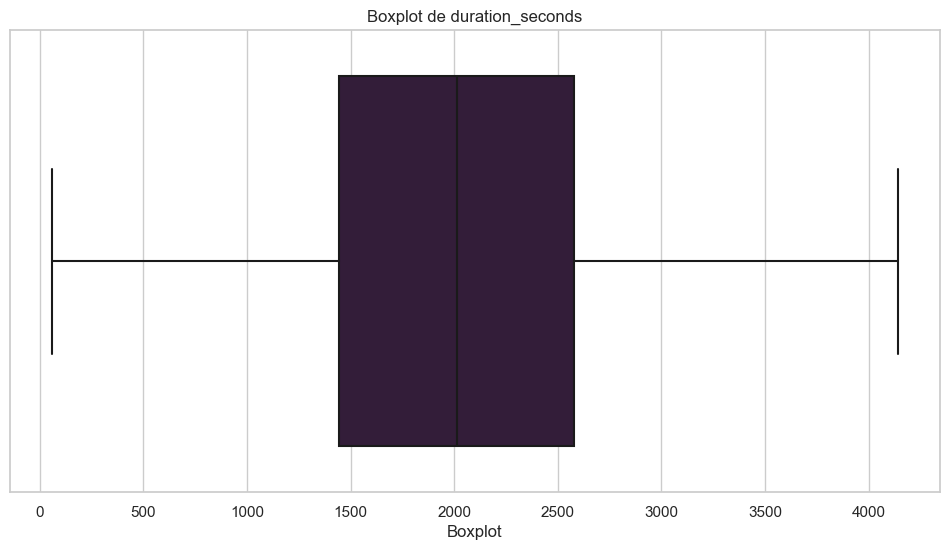

In [74]:
# boxplot suavizado
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_weather_without_outliers, x='duration_seconds')
plt.title('Boxplot de duration_seconds')
plt.xlabel('Boxplot')
plt.show()

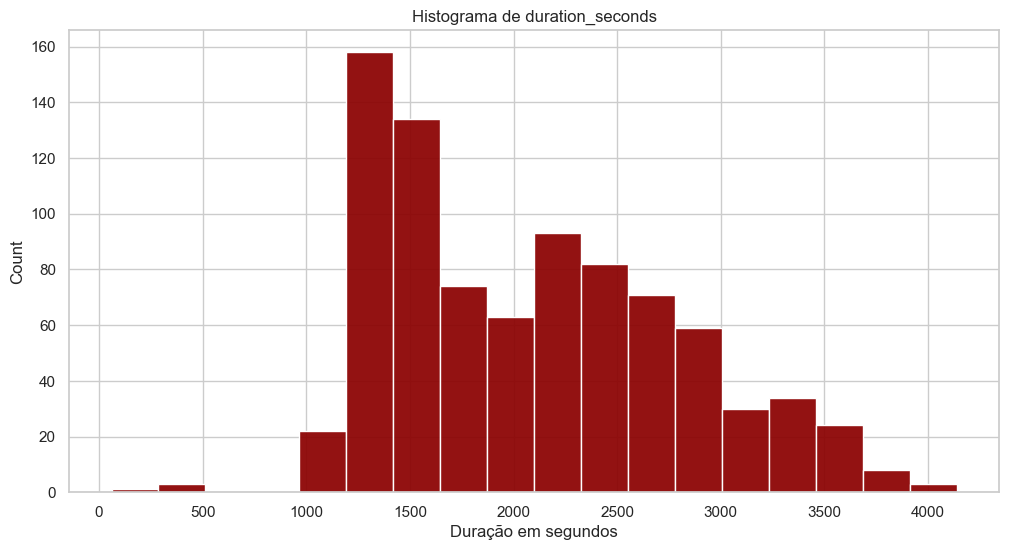

In [75]:
# histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df_weather_without_outliers, x='duration_seconds', color='darkred', alpha=0.93)
plt.title('Histograma de duration_seconds')
plt.xlabel('Duração em segundos')
plt.show()

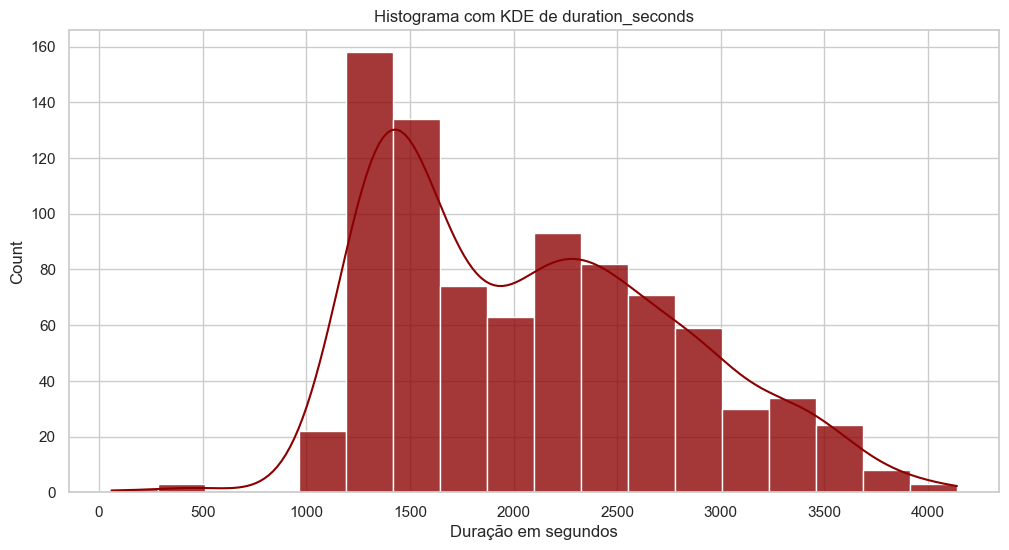

In [76]:
# densidade
plt.figure(figsize=(12, 6))
sns.histplot(data=df_weather_without_outliers, x='duration_seconds', color='darkred', alpha=0.78, kde=True)
plt.title('Histograma com KDE de duration_seconds')
plt.xlabel('Duração em segundos')
plt.show()

### *Agrupando por condições climáticas e analisando.*

In [77]:
# métricas agrupadas
grouped_weather_condition = df_weather_without_outliers.groupby('weather_conditions')['duration_seconds'].agg(['mean', 'median', 'sum'])
grouped_weather_condition

,mean,median,sum
weather_conditions,,,
Bad,2391.741497,2460.0,351586.0
Good,2024.296348,1896.0,1441299.0


*Percebemos que quando as condições climáticas estão ruins, a média e a mediana da duração das viagens é maior. Em contrapartida, no somatório geral, quando o tempo está bom, as pessoas viajam mais.*

### *Separando data de hora.*

In [78]:
# separando, formatando e recortando...
df_weather_without_outliers['date'] = df_weather_without_outliers['start_ts'].dt.date
df_weather_without_outliers['date'] = pd.to_datetime(df_weather_without_outliers['date'])
df_weather_without_outliers['day'] = df_weather_without_outliers['date'].dt.day
df_weather_without_outliers.drop('date', axis=1, inplace=True)

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\2071022722.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\2071022722.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\2071022722.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [79]:
# transformando e simplificando...
df_weather_without_outliers['start_ts'] = pd.to_datetime(df_weather_without_outliers['start_ts'])
df_weather_without_outliers['hour'] = df_weather_without_outliers['start_ts'].dt.strftime('%H')
df_weather_without_outliers['hour'] = pd.to_numeric(df_weather_without_outliers['hour'], errors='coerce')

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\3923694215.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\3923694215.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\3923694215.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [80]:
# criando coluna duration_minutes
df_weather_without_outliers['duration_minutes'] = df_weather_without_outliers['duration_seconds'] / 60

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_14160\2562865411.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
# reordenando
new_order = ['weather_conditions', 'day', 'hour', 'duration_seconds', 'duration_minutes', 'start_ts']
df_weather_without_outliers = df_weather_without_outliers[new_order]

In [82]:
# verificando valores únicos das novas colunas day e hour
df_weather_without_outliers.hour.unique()
df_weather_without_outliers.day.unique()

array([25,  4, 11, 18], dtype=int64)

### *Separando em 2 grupos por condição climática*

In [83]:
# filtrando...
df_good = df_weather_without_outliers.loc[df_weather_without_outliers['weather_conditions'] == 'Good']
df_bad = df_weather_without_outliers.loc[df_weather_without_outliers['weather_conditions'] == 'Bad']

In [84]:
# comparando os tamanhos de df_good
len(df_good) / df_weather_without_outliers.shape[0]

0.8288707799767171

In [85]:
# com df_bad
len(df_bad) / df_weather_without_outliers.shape[0]

0.17112922002328287

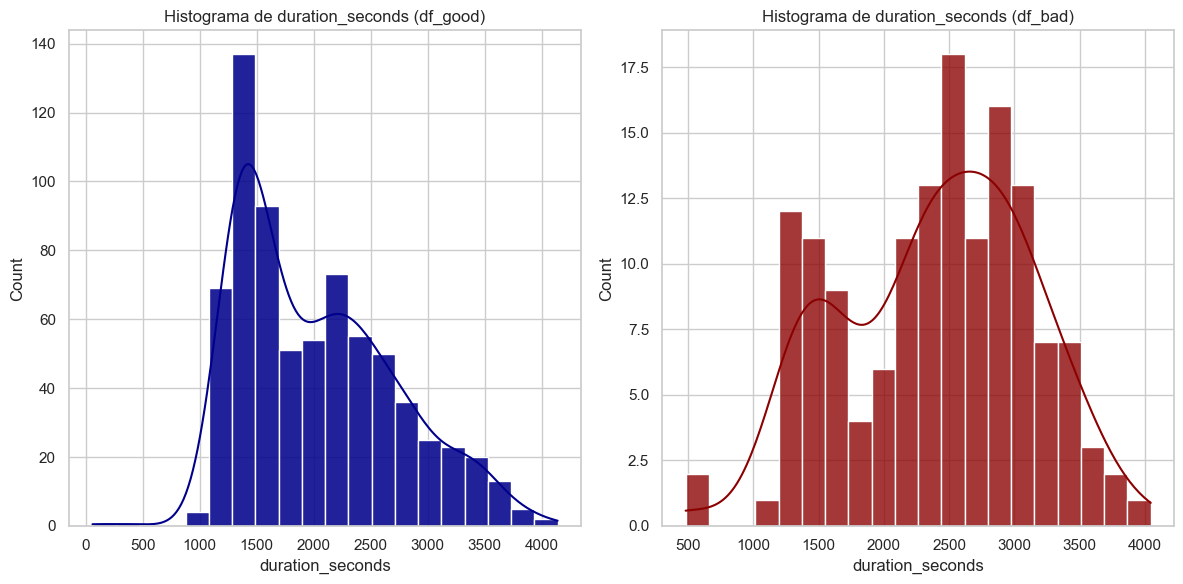

In [86]:
# histogramas de df_good (blue) e df_bad(red)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
sns.histplot(data=df_good, x="duration_seconds", bins=20, color='darkblue', alpha=0.87, kde=True)
plt.title("Histograma de duration_seconds (df_good)")

plt.subplot(1, 2, 2)  
sns.histplot(data=df_bad, x="duration_seconds", bins=20, color='darkred', alpha=0.78, kde=True)
plt.title("Histograma de duration_seconds (df_bad)")
plt.tight_layout()
plt.show()

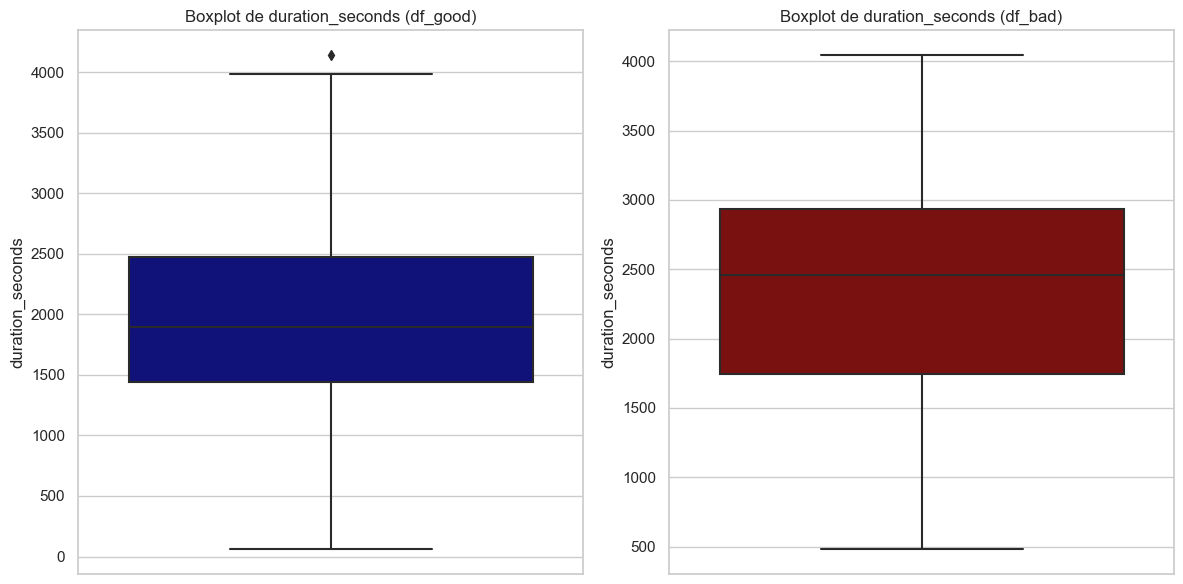

In [87]:
# boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_good, y="duration_seconds", color='darkblue')
plt.title("Boxplot de duration_seconds (df_good)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_bad, y="duration_seconds", color='darkred')
plt.title("Boxplot de duration_seconds (df_bad)")

plt.tight_layout()
plt.show()

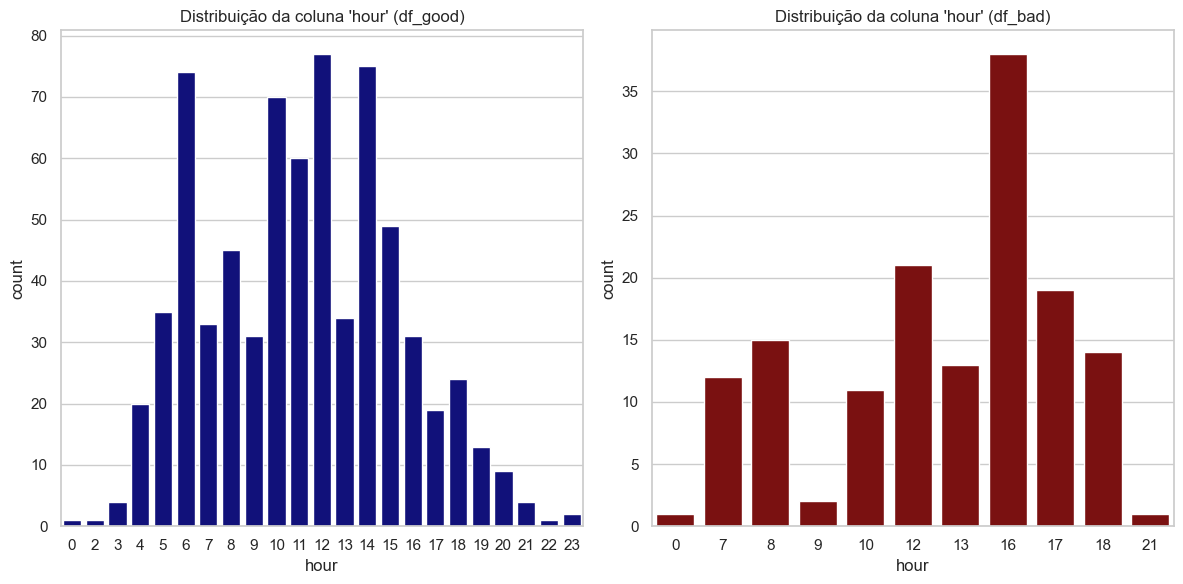

In [88]:
# histogramas por hora
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_good, x="hour", color="darkblue")
plt.title("Distribuição da coluna 'hour' (df_good)")

plt.subplot(1, 2, 2)
sns.countplot(data=df_bad, x="hour", color="darkred")
plt.title("Distribuição da coluna 'hour' (df_bad)")

plt.tight_layout()
plt.show()

*Verificamos aqui um frequência de horários muito mais abrangente e mais requisições de viagens em horários distintos quando o clima está bom.*

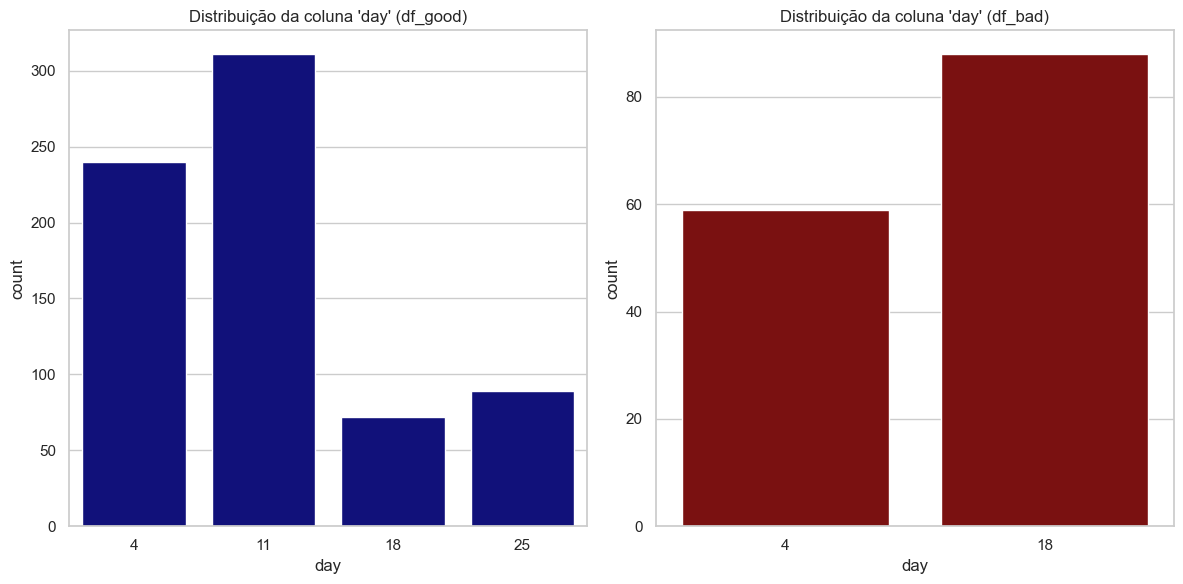

In [89]:
# plot por day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_good, x="day", color="darkblue")
plt.title("Distribuição da coluna 'day' (df_good)")

plt.subplot(1, 2, 2)
sns.countplot(data=df_bad, x="day", color="darkred")
plt.title("Distribuição da coluna 'day' (df_bad)")

plt.tight_layout()
plt.show()

*Notamos aqui que a pessoas viajam bastante aos sábados, já que todas as datas analisadas são sábados de 2017 do mês de Novembro, ainda mais quando o tempo está "good".*

*Houve alternância do status do clima ao longo do sábado dia 4 e 18 do mês analisado.*

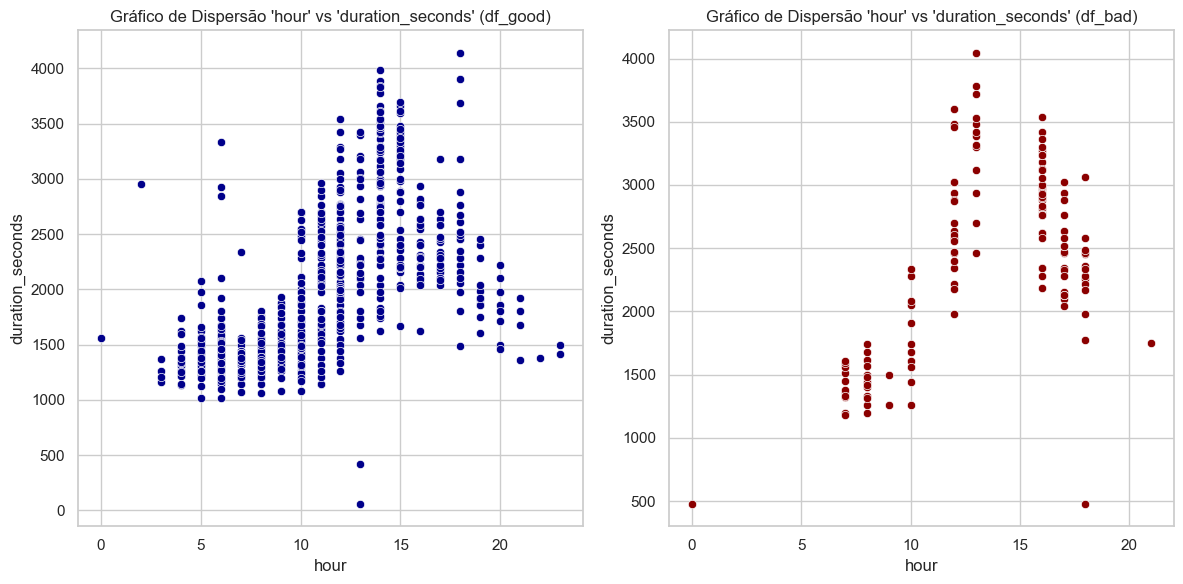

In [90]:
# plot de dispersão
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_good, x="hour", y="duration_seconds", color="darkblue")
plt.title("Gráfico de Dispersão 'hour' vs 'duration_seconds' (df_good)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bad, x="hour", y="duration_seconds", color="darkred")
plt.title("Gráfico de Dispersão 'hour' vs 'duration_seconds' (df_bad)")

plt.tight_layout()
plt.show()

*Quando temos tempo bom, as solicitações de corridas começam bem cedo aos Sábados, antes das 5h da manhã já percebemos uma demanda, que em tempo 'bad' não há.*

*Ambas apresentam pico entre os horários entre 11h e 14h.*


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Muito completa a análise dos dois cenários climáticos analisados aqui.

A escolha dos plots foi adequada e a condução das análises e conclusões foram de alto nível! Meus parabéns!
</div>



### *Transformando coluna weather_conditions para formato binário.*

In [91]:
# transformando
df_weather_without_outliers['weather_conditions'] = df_weather_without_outliers['weather_conditions'].replace({'Good': 1, 'Bad': 0})


In [92]:
# verificando...
df_weather_without_outliers.head()

,weather_conditions,day,hour,duration_seconds,duration_minutes,start_ts
0,1,25,16,2410.0,40.166667,2017-11-25 16:00:00
1,1,25,14,1920.0,32.000000,2017-11-25 14:00:00
2,1,25,12,1543.0,25.716667,2017-11-25 12:00:00
3,1,4,10,2512.0,41.866667,2017-11-04 10:00:00
4,1,11,7,1440.0,24.000000,2017-11-11 07:00:00


In [93]:
# correlação entre a hora do dia e o tempo das viagens
correlation_matrix = df_weather_without_outliers[['hour', 'duration_seconds']].corr()
print(correlation_matrix)

                      hour  duration_seconds
hour              1.000000          0.595145
duration_seconds  0.595145          1.000000


*Temos uma boa correlação com a coluna 'hour' e 'duration'.*

# *Testando de hipóteses*

### *Teste de hipótese para determinar se a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.*

*Definindo:*

- *Hipótese Nula (H0): A duração média dos passeios não muda nos sábados chuvosos.*
- *Hipótese Alternativa (H1): A duração média dos passeios muda nos sábados chuvosos.*

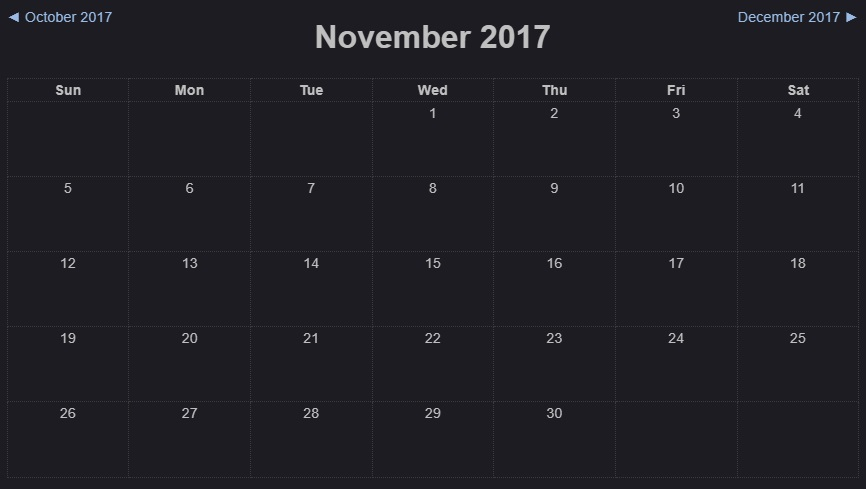

*As datas contidas nas informações do dataset são todas referentes a Sábados no ano de 2017, conforme imagem acima.*

In [94]:
# chamando df_bad e df_good
df_bad.info()
print()
df_bad.head()
print()
df_good.info()
print()
df_good.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 6 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   weather_conditions  147 non-null    object        
 1   day                 147 non-null    int64         
 2   hour                147 non-null    int64         
 3   duration_seconds    147 non-null    float64       
 4   duration_minutes    147 non-null    float64       
 5   start_ts            147 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 8.0+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 1064
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   weather_conditions  712 non-null    object        
 1   day                 712 non-null    int64         
 2   hour                712 non-nu

,weather_conditions,day,hour,duration_seconds,duration_minutes,start_ts
0,Good,25,16,2410.0,40.166667,2017-11-25 16:00:00
1,Good,25,14,1920.0,32.000000,2017-11-25 14:00:00
2,Good,25,12,1543.0,25.716667,2017-11-25 12:00:00
3,Good,4,10,2512.0,41.866667,2017-11-04 10:00:00
4,Good,11,7,1440.0,24.000000,2017-11-11 07:00:00


*Temos amostras não pareadas e uma delas apresenta poucos dados.*

In [95]:
# algumas métricas antes de realizar o teste...
mean_duration_good = df_good['duration_seconds'].mean()
median_duration_good = df_good['duration_seconds'].median()
std_duration_good = df_good['duration_seconds'].std()
var_duration_good = df_good['duration_seconds'].var()

mean_duration_bad = df_bad['duration_seconds'].mean()
median_duration_bad = df_bad['duration_seconds'].median()
std_duration_bad = df_bad['duration_seconds'].std()
var_duration_bad = df_bad['duration_seconds'].var()

print('Weather Good')
print("Média:", mean_duration_good)
print("Mediana:", median_duration_good)
print("Desvio Padrão:", std_duration_good)
print("Variância:", var_duration_good)

print()

print('Weather Bad')
print("Média:", mean_duration_bad)
print("Mediana:", median_duration_bad)
print("Desvio Padrão:", std_duration_bad)
print("Variância:", var_duration_bad)

Weather Good
Média: 2024.2963483146068
Mediana: 1896.0
Desvio Padrão: 688.1860688501043
Variância: 473600.0653593605

Weather Bad
Média: 2391.7414965986395
Mediana: 2460.0
Desvio Padrão: 723.266184619593
Variância: 523113.9738141832


In [96]:
# separando amostras
sample_bad = df_bad['duration_seconds']
sample_good = df_good['duration_seconds']

### *Verificando a variância das amostras*

In [97]:
# usando o teste de levene
statistic, p_value = st.levene(sample_bad, sample_good)

print("Estatística do teste de Levene:", statistic)
print("p-valor do teste de Levene:", p_value)

if p_value < 0.05:
    print("As variâncias são significativamente diferentes.")
else:
    print("Não há evidência significativa de diferença nas variâncias.")

Estatística do teste de Levene: 0.254660327673561
p-valor do teste de Levene: 0.6139422729176379
Não há evidência significativa de diferença nas variâncias.


### *Aplicando t-student*

In [100]:
# definindo alpha
alpha = 0.05

# aplicando teste t-student com o parâmetro equal_var = True
t_statistic, p_value = st.ttest_ind(sample_bad, sample_good, equal_var=True)
print(f'P-Value: {p_value}')

if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.")
else:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a duração média dos passeios muda nos sábados chuvosos.")


P-Value: 7.325186215819195e-09
Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Aqui seria bem legal utilizar o teste de Levene para testar a igualdade das variâncias e assim garantir o uso mais acurado possível do parâmetro equal_var na função do teste.
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    
No mais o teste foi conduzido corretamente.
</div>



<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Olá Rafael!

Muito obrigado pelas dicas e pela avaliação do meu Project 6!
Fico muito feliz com os seus elogios e comentários, pois estou me esforçando para me superar a cada novo projeto.

Dei uma pesquisada no conteúdo que me enviaste e apliquei assim o teste de igualdade das variâncias. Me surpreendi, pois o teste revelou que não há base estatística para assumirmos que as variâncias são diferentes. Foi muito bom ter aprendido sobre este novo teste obrigado!

Caso tenha mais algum ajuste a ser feito, por favor me acione, que pretendo colocar este Project 6 no meu portfólio para atrair ofertas de trabalho na área de dados!

Um forte abraço e bom final de semana.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ficou incrível, Thiago!

Agora está perfeito. Muito obrigado pelo ajuste.
</div>


*Vamos reforçar nosso teste de hipóteses realizando um bootstrap com as amostras.*

In [97]:
# médias observadas
observed_diff = np.mean(sample_bad) - np.mean(sample_good)

In [98]:
# ciclo for com mil amostras e reposição
bootstrap_diffs = []
num_bootstraps = 1000

for i in range(num_bootstraps):
    bootstrap_sample_1 = np.random.choice(sample_bad, len(sample_bad), replace=True)
    bootstrap_sample_2 = np.random.choice(sample_good, len(sample_good), replace=True)
    
    bootstrap_diff = np.mean(bootstrap_sample_1) - np.mean(bootstrap_sample_2)
    bootstrap_diffs.append(bootstrap_diff)

In [99]:
# intervalo de confiança de 95%
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

if confidence_interval[0] <= observed_diff <= confidence_interval[1]:
    print("Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.")
else:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a duração média dos passeios muda nos sábados chuvosos.")

Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.


*Confirmamos o mesma hipótese após o bootstrap.*

# Conclusão Final

*Nossa jornada de análise de dados nos levou a descobrir insights valiosos sobre as preferências dos passageiros e o impacto do clima nas corridas de táxi.*

*À medida que exploramos os dados, desvendamos padrões que nos permitirão aprimorar nossos serviços e tornar as viagens mais agradáveis para nossos passageiros.*

*Nossa análise revelou que a 'Flash Cab' é uma empresa consolidada com uma alta demanda por viagens, sugerindo que eles possuem uma frota considerável. Além disso, companhias afiliadas e associadas também desempenham um papel importante no setor.*

*Identificamos os destinos mais requisitados, com áreas centrais da cidade, como River North, Streeterville, West Loop e Loop, consistentemente no Top 10. Esses insights nos orientam a melhor posicionar nossa frota no distrito de negócios de Chicago, onde a demanda é mais alta.*

*Nossa análise também revelou que algumas corridas com tempo de duração igual a zero foram canceladas ou tiveram problemas na extração de dados, e também tomamos medidas para tratar os devidos outliers nos dados.*

*Geramos diversos gráficos para ilustrar nossas análises, dividimos as companhias em grupos e identificamos que, se quisermos atingir a liderança no setor, devemos nos inspirar nas empresas que se encontram no primeiro quartil (Q1) das métricas de desempenho.*

*Além disso, constatamos que é relevante estabelecer associações e afiliações, considerando a média de viagens. Nossos estudos mostram que as condições climáticas impactam diretamente o comportamento dos usuários, afetando os horários, a frequência de uso e a duração das viagens.*

*Concluímos que em dias ruins, as viagens tendem a ser mais longas, enquanto em dias bons, os clientes utilizam mais os táxis. Nossos gráficos de dispersão destacaram demandas de horários específicos, com picos notáveis durante o horário de almoço e início da manhã, dependendo das condições climáticas.*

*Verificamos que a hora do dia tem uma influência significativa na duração da viagem, conforme evidenciado pela matriz de correlação que geramos.*

*Além disso, testamos a hipótese de que a duração média das viagens do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos em comparação com os sábados não chuvosos. Nossos testes utilizando o método t-Student rejeitaram a hipótese nula, confirmando que a duração média das viagens realmente varia nos sábados chuvosos.*

*Para reforçar nossos resultados, aplicamos o método bootstrap e obtivemos os mesmos resultados, validando assim nossa análise.*


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>
